<a href="https://colab.research.google.com/github/sachin032/Tensorflow/blob/master/Transfer%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Standing on the shoulder of a giant** that is the primary thing it looks like when we talk about transfer learning.
Somebody somewhere with **mammoth machines** and **Argentinosaurus** size data, trained a huge and complex model and made it public, now we can leverage the work done by researchers  and re-train or re-design the trained model and make it specific towards our problem.

In [0]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

**We are going to take benefit from Inception-V3 pre-trained model, based on Inception-V3 we will try to retrain a new model.To do so we need the skeleton of model and the pretrained weights**


In [26]:
## To Download the weights for Inception-V3
!wget --no-check-certificate "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"  \-O "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

--2020-02-01 17:08:22--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   154MB/s    in 0.5s    

2020-02-01 17:08:23 (154 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



**Tensorflow based Keras provides the skeleton of the Inception-V3**

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

**1. Load the weights**
<br>
**2. Get the pretrained model skeleton**

In [0]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

**Loading pretrained weights to model skeleton**

In [0]:
pre_trained_model.load_weights(local_weights_file)

In [30]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

**Controlling the layers which has not to be trained or to be locked away from training**

In [0]:
for layer in pre_trained_model.layers:
    layer.trainable = False

**Choose the layer on which the new deep neural network will be patched up, ideally in a pre-trained neural network, every layer has a chronology by it's name. As we must not choose the flat layers so we are choosing layer mixed7 which will be the connection point for our new Deep neural network.**

In [0]:
lastLayer = pre_trained_model.get_layer('mixed7')
last_output = lastLayer.output

**So without delay let's fetch the selected layer from pre-trained model and take the output of it**

In [0]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

In [0]:
model = Model(pre_trained_model.input, x)
model.compile(optimizer=RMSprop(lr=0.01),
              loss="binary_crossentropy",
              metrics=['acc'])

In [35]:
# #Horse-or-Human
!wget --no-check-certificate "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip" \-O "/tmp/horse-or-human.zip"

# #Validation data for Horse-or-Human
!wget --no-check-certificate "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip" \-O "/tmp/validation-horse-or-human.zip"


--2020-02-01 17:08:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   188MB/s    in 0.8s    

2020-02-01 17:08:35 (188 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-02-01 17:08:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [applicati

In [0]:
import os
import zipfile

from os import path, getcwd, chdir

local_zip = "/tmp/horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp/horse-or-human")
zip_ref.close()

validation_local_zip = "/tmp/validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(validation_local_zip, 'r')
zip_ref.extractall("/tmp/validation-horse-or-human")
zip_ref.close()

**Training without regularization**

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_data_path = "/tmp/horse-or-human/"
validation_data_path = "/tmp/validation-horse-or-human/"

#Make datagen for Train generator
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

#Train generator
train_generator = train_datagen.flow_from_directory(training_data_path,
                                                    target_size=(150, 150),
                                                    batch_size=50,
                                                    class_mode='binary')

#Make datagen for validation generator
validation_datagen = ImageDataGenerator(rescale=1./ 255) 

#Validation generator
validation_generator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=(150, 150),
    batch_size=50,
    class_mode='binary')

history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=25,
                              verbose=1,
                              validation_steps=50)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/25
100/100 [==============================] - 61s 606ms/step - loss: 11.7327 - acc: 0.9126 - val_loss: 0.0123 - val_acc: 0.9963
Epoch 2/25
100/100 [==============================] - 59s 587ms/step - loss: 0.5123 - acc: 0.9738 - val_loss: 1.8057e-07 - val_acc: 1.0000
Epoch 3/25
100/100 [==============================] - 57s 568ms/step - loss: 0.2473 - acc: 0.9747 - val_loss: 6.0837e-04 - val_acc: 1.0000
Epoch 4/25
100/100 [==============================] - 56s 557ms/step - loss: 0.3839 - acc: 0.9754 - val_loss: 1.3913e-12 - val_acc: 1.0000
Epoch 5/25
100/100 [==============================] - 54s 543ms/step - loss: 0.1543 - acc: 0.9877 - val_loss: 3.7374e-12 - val_acc: 1.0000
Epoch 6/25
100/100 [==============================] - 59s 587ms/step - loss: 0.1587 - acc: 0.9873 - val_loss: 5.0643e-14 - val_acc: 1.0000
Epoch 7/25
100/100 [==============================] - 57s 572ms/step - loss: 0.1822 - 

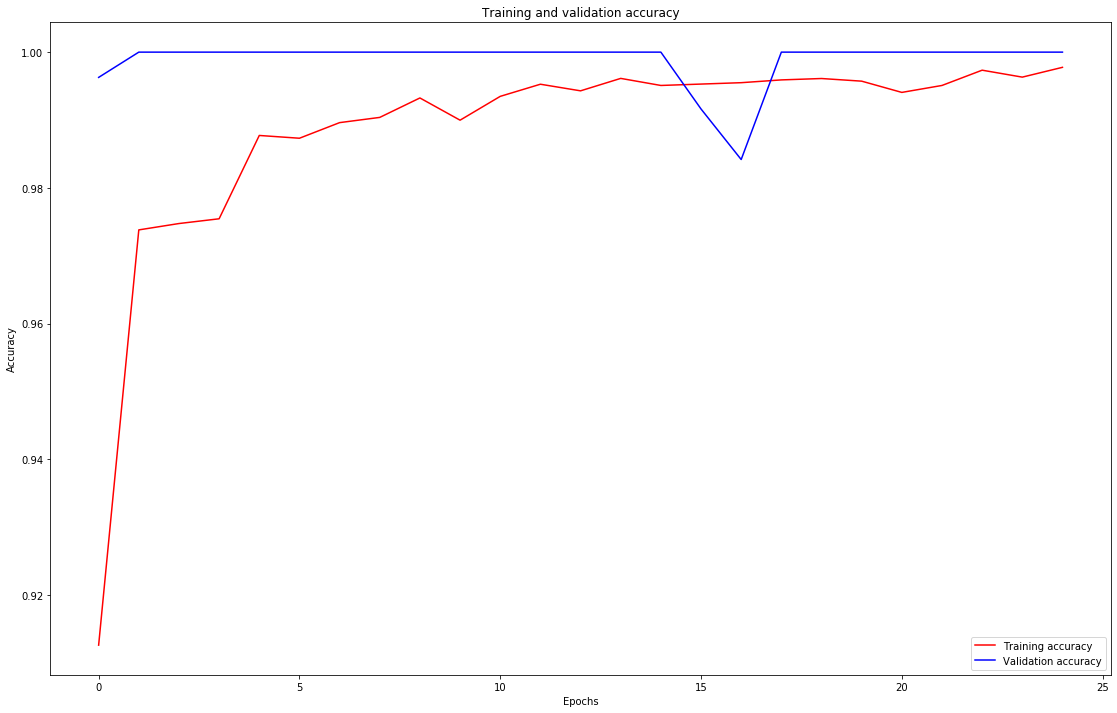

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(19,12))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)

plt.show()

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(19,12))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.show()

**Training with regularization**

In [39]:
dropout_model = layers.Flatten()(last_output)
dropout_model =  layers.Dense(1024, activation='relu')(dropout_model)

#Dropping 20% layers on the fly during training
dropout_model = layers.Dropout(0.2)(dropout_model)
dropout_model = layers.Dense(1, activation='sigmoid')(dropout_model)

regularized_model = Model(pre_trained_model.input, dropout_model)
regularized_model.compile(optimizer=RMSprop(lr=0.01),
              loss="binary_crossentropy",
              metrics=['acc'])

dropout_history = regularized_model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=25,
                              verbose=1,
                              validation_steps=50)

Epoch 1/25
100/100 [==============================] - 58s 578ms/step - loss: 11.9689 - acc: 0.9075 - val_loss: 0.0607 - val_acc: 0.9916
Epoch 2/25
100/100 [==============================] - 56s 557ms/step - loss: 0.8497 - acc: 0.9657 - val_loss: 1.6956e-06 - val_acc: 1.0000
Epoch 3/25
100/100 [==============================] - 54s 540ms/step - loss: 0.5727 - acc: 0.9731 - val_loss: 1.5791e-08 - val_acc: 1.0000
Epoch 4/25
100/100 [==============================] - 53s 528ms/step - loss: 0.4408 - acc: 0.9789 - val_loss: 0.0987 - val_acc: 0.9958
Epoch 5/25
100/100 [==============================] - 51s 511ms/step - loss: 0.3566 - acc: 0.9846 - val_loss: 0.3566 - val_acc: 0.9916
Epoch 6/25
100/100 [==============================] - 56s 558ms/step - loss: 0.3604 - acc: 0.9890 - val_loss: 9.1699e-07 - val_acc: 1.0000
Epoch 7/25
100/100 [==============================] - 54s 542ms/step - loss: 0.1932 - acc: 0.9894 - val_loss: 0.0546 - val_acc: 0.9963
Epoch 8/25
100/100 [======================

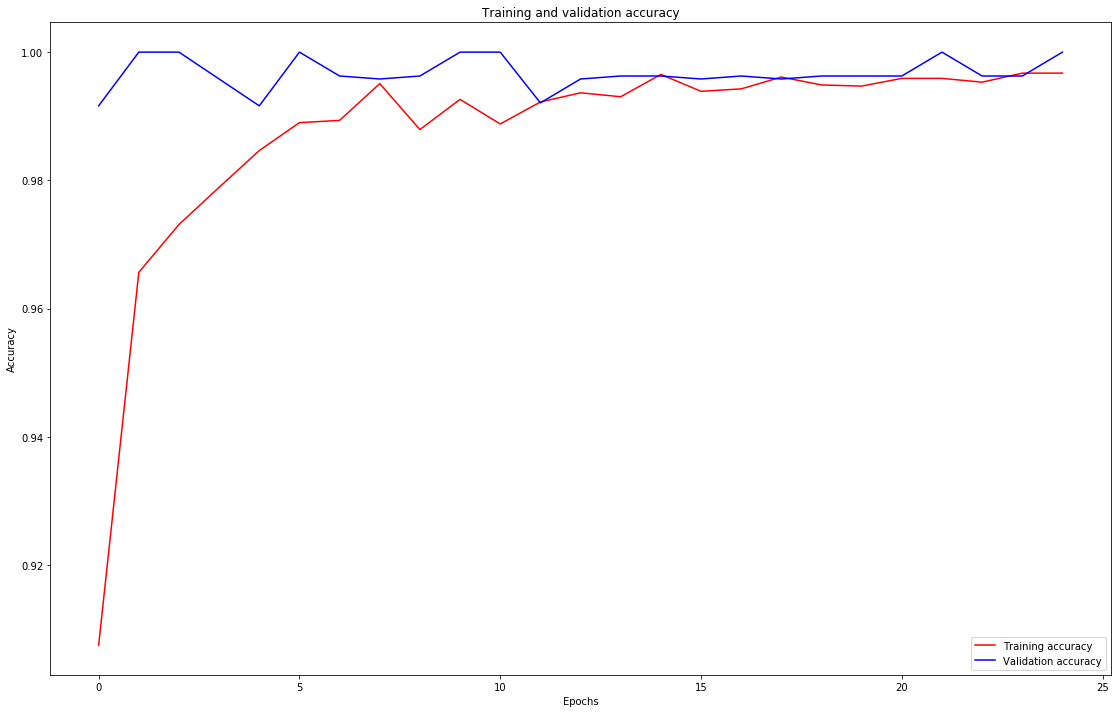

In [40]:
#Training vs Validation accuracy
acc = dropout_history.history['acc']
val_acc = dropout_history.history['val_acc']

#Training vs Validation loss
loss = dropout_history.history['loss']
val_loss = dropout_history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(19,12))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.show()

In [43]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a horse")
  else:
    print(fn + " is a man")

Saving image_1.jpeg to image_1 (2).jpeg
[1.]
image_1.jpeg is a horse


<br>
<br>

Now lets upload the same image and test it against the regularized model.


In [47]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = regularized_model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.8:
    print(fn + " is a horse")
  else:
    print(fn + " is a man")

Saving images_2.jpeg to images_2 (2).jpeg
[1.]
images_2.jpeg is a horse
